In [7]:
import numpy as np
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivatives(x):
    return x*(1-x)

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([[0],[1],[1],[0]])

input_neurons=2
hidden_neurons=2
output_neurons=1
hidden_weights=np.random.uniform(size=(input_neurons,hidden_neurons))
hidden_bias=np.random.uniform(size=(1,hidden_neurons))
output_weights=np.random.uniform(size=(hidden_neurons,output_neurons))
output_bias = np.random.uniform(size=(1,output_neurons))
lr=0.3
epochs=10000


for epoch in range(epochs):
    hidden_layer_activation=np.dot(X,hidden_weights)+hidden_bias
    print(f"epoch {epoch+1},Hidden Weights : ",hidden_weights)
    hidden_layer_output=sigmoid(hidden_layer_activation)
    output_layer_activation = np.dot(hidden_layer_output,output_weights)+output_bias
    
    predicted_output=sigmoid(output_layer_activation)
    error=y-predicted_output
    print(f"epoch {epoch+1},Output Weights : ",hidden_weights)
    print(f"epoch {epoch+1},Prediction : ",predicted_output)
    
    d_predicted_output= error*sigmoid_derivatives(predicted_output)
    error_hidden_layer=d_predicted_output.dot(output_weights.T)
    d_hidden_layer=error_hidden_layer*sigmoid_derivatives(hidden_layer_output)
    
    output_weights+=hidden_layer_output.T.dot(d_predicted_output)*lr
    output_bias+=np.sum(d_predicted_output,axis=0,keepdims=True)*lr
    hidden_weights+=X.T.dot(d_hidden_layer)*lr
    hidden_bias+=np.sum(d_hidden_layer,axis=0,keepdims=True)*lr

    
    

epoch 1,Hidden Weights :  [[0.58954432 0.96181478]
 [0.00217201 0.04751119]]
epoch 1,Output Weights :  [[0.58954432 0.96181478]
 [0.00217201 0.04751119]]
epoch 1,Prediction :  [[0.83605424]
 [0.83642909]
 [0.85516879]
 [0.85540501]]
epoch 2,Hidden Weights :  [[ 0.5854129   0.96096196]
 [-0.00145484  0.04680195]]
epoch 2,Output Weights :  [[ 0.5854129   0.96096196]
 [-0.00145484  0.04680195]]
epoch 2,Prediction :  [[0.82150724]
 [0.82173678]
 [0.84035532]
 [0.84049485]]
epoch 3,Hidden Weights :  [[ 0.5812675   0.96023935]
 [-0.00506019  0.04621171]]
epoch 3,Output Weights :  [[ 0.5812675   0.96023935]
 [-0.00506019  0.04621171]]
epoch 3,Prediction :  [[0.80553417]
 [0.80560656]
 [0.82388366]
 [0.8239153 ]]
epoch 4,Hidden Weights :  [[ 0.57715769  0.95966933]
 [-0.0085967   0.045756  ]]
epoch 4,Output Weights :  [[ 0.57715769  0.95966933]
 [-0.0085967   0.045756  ]]
epoch 4,Prediction :  [[0.78817081]
 [0.78807673]
 [0.80575658]
 [0.80567072]]
epoch 5,Hidden Weights :  [[ 0.57314081  0.9

In [8]:
final_predictions=predicted_output
print(np.round(final_predictions,2))

[[0.02]
 [0.98]
 [0.5 ]
 [0.5 ]]


In [10]:
import pandas as pd
text_data = pd.read_csv("E:\Mainak Das_087\Day6\FullIJCNN2013.csv",header=None)

In [11]:
text_data.head()

,0,1,2,3,4,5
0,00000.ppm,774,411,815,446,11
1,00001.ppm,983,388,1024,432,40
2,00001.ppm,386,494,442,552,38
3,00001.ppm,973,335,1031,390,13
4,00002.ppm,892,476,1006,592,39


In [12]:
text_data

,0,1,2,3,4,5
0,00000.ppm,774,411,815,446,11
1,00001.ppm,983,388,1024,432,40
2,00001.ppm,386,494,442,552,38
3,00001.ppm,973,335,1031,390,13
4,00002.ppm,892,476,1006,592,39
...,...,...,...,...,...,...
1208,00896.ppm,808,412,846,450,15
1209,00897.ppm,804,526,828,550,42
1210,00898.ppm,323,504,355,536,4
1211,00898.ppm,817,510,849,542,4


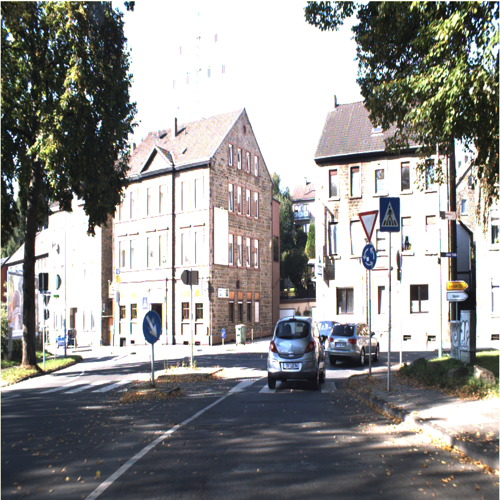

In [26]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('E:\Mainak Das_087\Day6\FullIJCNN2013/00001.ppm')
image.resize(size=(500,500))

In [23]:
image_array=np.array(image)
image_array

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [ 35,  35,   0],
        ...,
        [  0,  42,   0],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [ 41,  48,   0],
        ...,
        [ 12,  89,  90],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [ 38,  46,   0],
        ...,
        [ 14,  91,  92],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [ 38,  45,   0],
        ...,
        [  6,  86,  88],
        [255, 255, 255],
        [255, 255, 255]]

In [24]:
text_data[5].value_counts()

38    88
12    85
13    83
2     81
10    80
1     79
4     68
8     57
5     53
7     41
9     41
11    38
18    38
14    32
25    31
3     30
17    29
23    20
35    20
6     19
26    18
30    16
33    16
15    15
28    14
22    13
34    12
42    11
40    10
36     9
20     9
16     8
32     8
41     7
39     6
29     5
21     5
24     5
0      4
27     3
37     2
19     2
31     2
Name: 5, dtype: int64

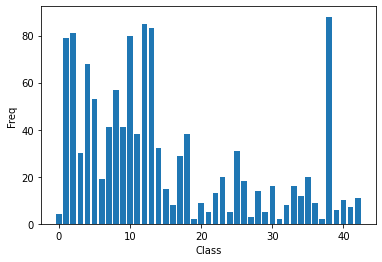

In [25]:
distribution = text_data[5].value_counts()
plt.bar(distribution.index,distribution.values)
plt.xlabel('Class')
plt.ylabel('Freq')
plt.show()